<a href="https://colab.research.google.com/github/Bernadeth696/DeepLearning_VGG16/blob/master/VGG16_Tugas3DeepLearningTes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **TRAINING DAN VALIDATION**

In [1]:
import numpy as np 
import keras,os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.preprocessing.image import ImageDataGenerator

In [2]:
#membagi kelas
IMAGE_SIZE = 224
classes = 2

In [3]:
#menarik file dari google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls '/content/drive'

MyDrive


In [5]:
#membuat Path/tempat load datasetnya
train_path = '/content/drive/MyDrive/dataset/deep_learning/buahJeruk/training'
test_path = '/content/drive/MyDrive/dataset/deep_learning/buahJeruk/testing'

In [6]:
#melakukan augmentasi data pada gambar dan mempersiapkan data pelatihan model vgg16
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=5,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        fill_mode="nearest")

train_generator = train_datagen.flow_from_directory(
         '/content/drive/MyDrive/dataset/deep_learning/buahJeruk/training',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse")

Found 71 images belonging to 2 classes.


In [7]:
class_name = list(train_generator.class_indices.keys())
class_name

['masak', 'tidak masak']

In [8]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range= 5,
        width_shift_range= 0.1,
        height_shift_range= 0.1, 
        horizontal_flip= True,
        fill_mode= "nearest")

test_generator = test_datagen.flow_from_directory(
           '/content/drive/MyDrive/dataset/deep_learning/buahJeruk/testing',
        target_size= (IMAGE_SIZE, IMAGE_SIZE), class_mode="sparse")

Found 43 images belonging to 2 classes.


In [9]:
#membuat objek model Sequential baru
model = Sequential()

#Menambahkan lapisan Conv2D ke model untuk untuk mengekstrak fitur dari gambar. 
model.add(Conv2D(input_shape=(224, 224, 3), filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))

#Menambahkan lapisan MaxPooling2D ke model untuk mereduksi dimensi spasial output dari lapisan konvolusi dengan cara mengambil nilai maksimum dalam jendela pool yang ditentukan. 
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [10]:
model.add(Flatten())

model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [11]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [13]:
train_data = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 71 images belonging to 2 classes.


In [14]:
test_data = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 43 images belonging to 2 classes.


In [15]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("vgg16.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=5, mode='auto')

#epoch nya sengaja dikasih 3 saja (sebelumnya 10 epoch)
hist = model.fit_generator(steps_per_epoch=10,generator=train_data, validation_data= test_data, validation_steps=10,epochs=3,callbacks=[checkpoint,early])

<ipython-input-15-a08a75e133ae>:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(steps_per_epoch=10,generator=train_data, validation_data= test_data, validation_steps=10,epochs=3,callbacks=[checkpoint,early])


Epoch 1/3
 3/10 [========>.....................] - ETA: 8:01 - loss: 1.1830 - accuracy: 0.6338

10/10 [==============================] - 205s 19s/step - loss: 1.1830 - accuracy: 0.6338 - val_loss: 1.3647 - val_accuracy: 0.5581


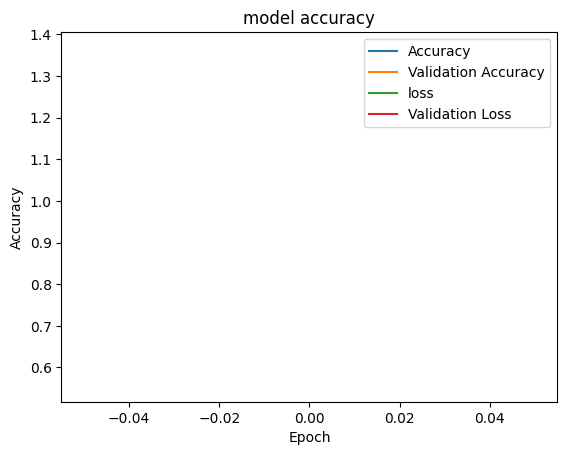

In [16]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [17]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 2s 2s/step


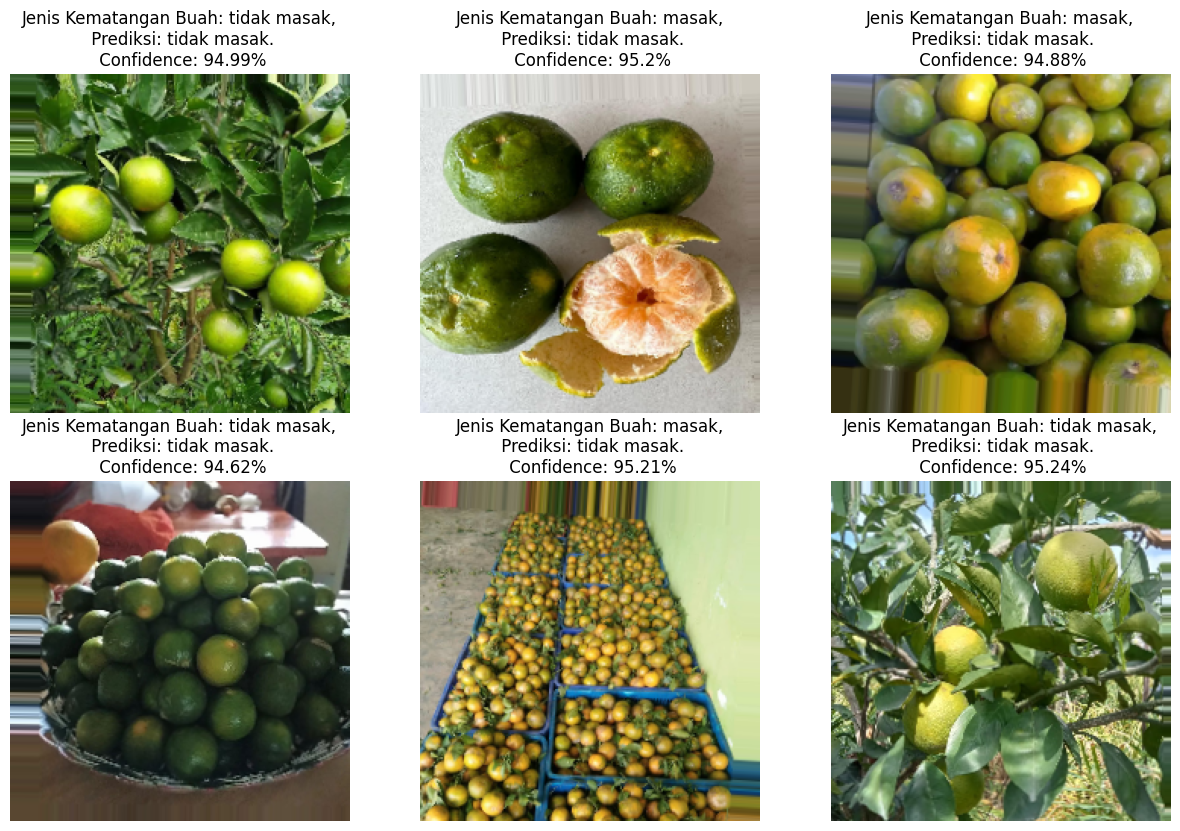

In [29]:
plt.figure(figsize=(15, 15))

for images, labels in test_generator:
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_name[int(labels[i])] 
        plt.title(f"Jenis Kematangan Buah: {actual_class},\n Prediksi: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")
    break

### **PREDIKSI**

In [19]:
#untuk mengimpor fungsi load_model dari modul models dalam pustaka keras dari TensorFlow dan secara otomatis berbentuk folder seperti yang dibuat

from tensorflow.keras.models import load_model
model.save( '/content/drive/MyDrive/dataset/deep_learning/buahJeruk/simpan_Model/vgg16.h5')

In [20]:
# tambah library
import cv2
import os 

In [21]:
path='/content/drive/MyDrive/dataset/deep_learning/buahJeruk/simpan_Model'

In [22]:
# memuat dan menampung model yang telah disimpan dalam format .h5
model = tf.keras.models.load_model(path+'/vgg16.h5')

In [23]:
# mendefinisikan kelas target terbagi 2 kelas
class_names = ['masak', 'tidak masak']

In [24]:
#definisikan path ke folder yang berisi gambar
img_folder = '/content/drive/MyDrive/dataset/deep_learning/buahJeruk/testing/masak'

In [25]:
# mendapatkan daftar nama file pada folder
img_files = os.listdir(img_folder)

In [26]:
# memilih 3 gambar secara acak dalam folder testing mobil
img_files = np.random.choice(img_files, size=1, replace=False)

In [27]:
# menampilkan gambar dan hasil prediksi untuk setiap gambar dan memuat gambar
for img_file in img_files:
    img_path = os.path.join(img_folder, img_file)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))

    # merubah gambar menjadi array numpy
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)

    # melakukan prediksi menggunakan model
    predictions = model.predict(img_array)

    #ambil indeks kelas dengan probabilitas tertinggi
    predicted_class = np.argmax(predictions[0])

1/1 [==============================] - 2s 2s/step


Hasil Prediksi Untuk Gambar jeruk_masak (34).jpg adalah: tidak masak


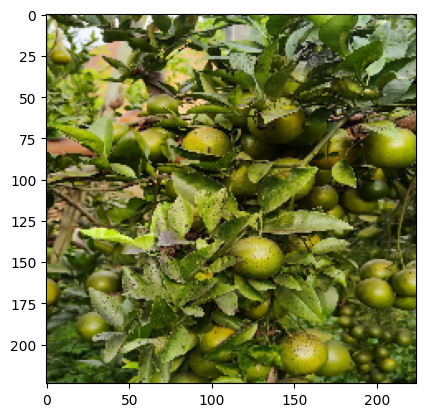

In [28]:
print("Hasil Prediksi Untuk Gambar {} adalah: {}".format(img_file, class_names[predicted_class]))
plt.imshow(img)
plt.show()